In [ ]:
import os

# List of required folder paths
folders = [
    "./DataSet/",
    "./RNN_save_model/LSTM/MAINMODEL/",
    "./RNN_save_model/LSTM/EDGE/",
    "./RNN_save_model/LSTM/CLOUD/",
    "./RNN_save_model/LSTM/UPDATE/"
]

# Create folders if they don't already exist
for folder in folders:
    if not os.path.exists(folder):
        os.makedirs(folder)
        print(f"Created: {folder}")
    else:
        print(f"Already exists: {folder}")


Already exists: ./DataSet/
Already exists: ./RNN_save_model/LSTM/MAINMODEL/
Already exists: ./RNN_save_model/LSTM/EDGE/
Already exists: ./RNN_save_model/LSTM/CLOUD/
Already exists: ./RNN_save_model/LSTM/UPDATE/


In [ ]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_fscore_support,auc
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
import keras
import tensorflow
from keras.layers import Dropout, BatchNormalization
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import seaborn as sns
import joblib



# Load your dataset
df = pd.read_csv("./DataSet/Commands_Classification_Dataset7.csv",encoding="latin1")  # Update with you dataset filename


In [ ]:
df.head()

,Class,Subclass,SubclassCategory,Commands,Response,Label
0,Bike,Edge,Battery/Fuel,What is my current battery level?,Updating please wait,1
1,Bike,Edge,Battery/Fuel,How much range do I have left on my battery?,Updating please wait,1
2,Bike,Edge,Battery/Fuel,When was the last time my battery was charged?,Updating please wait,1
3,Bike,Edge,Battery/Fuel,How long until my battery is fully charged?,Updating please wait,1
4,Bike,Edge,Battery/Fuel,How long should I charge my vehicle for a suff...,Updating please wait,1


In [ ]:
df['Subclass'].unique()

array(['Edge', 'Not needed', 'Cloud', 'Update'], dtype=object)

In [ ]:
new_df = df[df['Subclass'] != 'Not needed'].reset_index(drop=True)
new_df

,Class,Subclass,SubclassCategory,Commands,Response,Label
0,Bike,Edge,Battery/Fuel,What is my current battery level?,Updating please wait,1
1,Bike,Edge,Battery/Fuel,How much range do I have left on my battery?,Updating please wait,1
2,Bike,Edge,Battery/Fuel,When was the last time my battery was charged?,Updating please wait,1
3,Bike,Edge,Battery/Fuel,How long until my battery is fully charged?,Updating please wait,1
4,Bike,Edge,Battery/Fuel,How long should I charge my vehicle for a suff...,Updating please wait,1
...,...,...,...,...,...,...
1315,Bike,Update,Check,Check for current available update,Processing your command,1
1316,Bike,Update,Check,Please check for current available update,Processing your command,1
1317,Bike,Update,Check,Please check for current update,Processing your command,1
1318,Bike,Update,Check,Check for available updates,Processing your command,1


In [ ]:
new_df['Subclass'].unique()

array(['Edge', 'Cloud', 'Update'], dtype=object)

In [ ]:
new_df['SubclassCategory'].unique()

array(['Battery/Fuel', 'Tires/Tyres', 'Songs/media', 'News/Notification',
       'Weather', 'Cancel', 'Perform', 'Traffic/Maps', 'Check', 'Basic'],
      dtype=object)

In [ ]:
Y_Categorical=new_df['Subclass']
Y_Categorical

,Subclass
0,Edge
1,Edge
2,Edge
3,Edge
4,Edge
...,...
1315,Update
1316,Update
1317,Update
1318,Update


In [ ]:
# Count the unique values in the Y_Categorical column
unique_values_count = new_df['Subclass'].value_counts()

# Display the result
print(unique_values_count)

Subclass
Edge      551
Cloud     450
Update    319
Name: count, dtype: int64


In [ ]:
len(new_df)

1320

In [ ]:
X=new_df['Commands']
X

,Commands
0,What is my current battery level?
1,How much range do I have left on my battery?
2,When was the last time my battery was charged?
3,How long until my battery is fully charged?
4,How long should I charge my vehicle for a suff...
...,...
1315,Check for current available update
1316,Please check for current available update
1317,Please check for current update
1318,Check for available updates


In [ ]:
# Automatically convert categorical values to labels
new_df['Subclass_Label'], _ = pd.factorize(new_df['Subclass'])
new_df['Subclass_Label']


,Subclass_Label
0,0
1,0
2,0
3,0
4,0
...,...
1315,2
1316,2
1317,2
1318,2


In [ ]:
new_df

,Class,Subclass,SubclassCategory,Commands,Response,Label,Subclass_Label
0,Bike,Edge,Battery/Fuel,What is my current battery level?,Updating please wait,1,0
1,Bike,Edge,Battery/Fuel,How much range do I have left on my battery?,Updating please wait,1,0
2,Bike,Edge,Battery/Fuel,When was the last time my battery was charged?,Updating please wait,1,0
3,Bike,Edge,Battery/Fuel,How long until my battery is fully charged?,Updating please wait,1,0
4,Bike,Edge,Battery/Fuel,How long should I charge my vehicle for a suff...,Updating please wait,1,0
...,...,...,...,...,...,...,...
1315,Bike,Update,Check,Check for current available update,Processing your command,1,2
1316,Bike,Update,Check,Please check for current available update,Processing your command,1,2
1317,Bike,Update,Check,Please check for current update,Processing your command,1,2
1318,Bike,Update,Check,Check for available updates,Processing your command,1,2


In [ ]:
y=new_df['Subclass_Label']
y

,Subclass_Label
0,0
1,0
2,0
3,0
4,0
...,...
1315,2
1316,2
1317,2
1318,2


In [ ]:
y.unique()

array([0, 1, 2])

In [ ]:
import numpy as np
import random
import tensorflow as tf
#7,17,2,
# Set the random seeds for reproducibility
def set_seed(seed=7):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

# Optionally, if using GPU, configure GPU settings to avoid non-determinism
def configure_gpu_memory_growth():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(e)

# Call these functions at the start of your code to ensure reproducibility
set_seed(7)  # Setting the seed for reproducibility
configure_gpu_memory_growth()  # Optionally manage GPU memory growth

In [ ]:
def Main_Model(X, y, Y_Categorical, epochs=15,batch_size=64):

    # Tokenize the text data
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X)
    X_sequences = tokenizer.texts_to_sequences(X)

    # Padding sequences to make them of equal length
    max_sequence_length = max([len(seq) for seq in X_sequences])
    X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length, padding='post')

    #print(y)
    print(Y_Categorical.unique())
    print(y.unique())

    # Convert labels to one-hot encoding
    y_encoded = to_categorical(y)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

    # Define the RNN model for multiclass classification
    num_classes = len(np.unique(y))  # Number of unique classes
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=500, input_length=max_sequence_length))
    model.add(LSTM(256, return_sequences=True))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(num_classes, activation='softmax'))  # Use softmax activation for multiclass classification

    # Compile the model with categorical cross-entropy loss
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    # Get and print training accuracy from history
    training_accuracy = history.history['accuracy'][-1]
    print("Training Accuracy:", training_accuracy)

    # Evaluate the model on test data
    loss, accuracy = model.evaluate(X_test, y_test)
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)

    # Predicting the labels for test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    # Classification report
    print("\nClassification Report:\n", classification_report(y_test_classes, y_pred_classes))


    # Assuming Y_Categorical is an array of the actual class names
    class_labels = Y_Categorical.unique()  # Get the unique class names

    # Confusion Matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC-AUC Curve (One-vs-Rest)
    y_test_bin = label_binarize(y_test_classes, classes=np.arange(num_classes))  # Binarize labels for ROC-AUC
    y_pred_bin = label_binarize(y_pred_classes, classes=np.arange(num_classes))

    # Calculate Precision, Recall, F1-Score
    precision, recall, f1, _ = precision_recall_fscore_support(y_test_classes, y_pred_classes, average='macro')
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Calculate AUC for each class
    roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro')
    print(f"ROC-AUC Score: {roc_auc}")

    # Plot ROC curves for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])

    plt.figure(figsize=(10, 7))
    for i in range(num_classes):
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Multiclass Classification')
    plt.legend(loc="lower right")
    plt.show()

    # Plot training and testing accuracy curves
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend()
    plt.show()

    # Plot training and testing loss curves
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Testing Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim([0, max(max(history.history['loss']), max(history.history['val_loss']))])
    plt.legend()
    plt.title('Loss Curve')
    plt.show()

    # Plot Precision-Recall (PR) curves for each class
    precision_dict = dict()
    recall_dict = dict()

    for i in range(num_classes):
        precision_dict[i], recall_dict[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_bin[:, i])

    plt.figure(figsize=(10, 7))
    for i in range(num_classes):
        plt.plot(recall_dict[i], precision_dict[i], label=f'{class_labels[i]}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - Multiclass Classification')
    plt.legend(loc="lower left")
    plt.show()

    return tokenizer, model, max_sequence_length


In [ ]:
# Function to predict the class of a command
def predict_class(command, tokenizer,model,max_sequence_length):
    sequence = tokenizer.texts_to_sequences([command])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length, padding='post')
    prediction = model.predict(padded_sequence)
    predicted_class_index = np.argmax(prediction)
    return predicted_class_index

['Edge' 'Cloud' 'Update']
[0 1 2]
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 512ms/step - accuracy: 0.3948 - loss: 1.0663 - val_accuracy: 0.6288 - val_loss: 0.7054
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 537ms/step - accuracy: 0.6987 - loss: 0.6218 - val_accuracy: 0.9015 - val_loss: 0.3397
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 566ms/step - accuracy: 0.9571 - loss: 0.1914 - val_accuracy: 0.9318 - val_loss: 0.2799
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 439ms/step - accuracy: 0.9679 - loss: 0.1386 - val_accuracy: 0.9432 - val_loss: 0.1823
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 516ms/step - accuracy: 0.9859 - loss: 0.0810 - val_accuracy: 0.9432 - val_loss: 0.2250
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 518ms/step - accuracy: 0.9771 - loss: 0.0999 - val_accuracy: 0.9432 - val_loss: 0.2207
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 517ms/step - accuracy: 0.9978 - loss: 0.0228 - val_accuracy: 0.9508 - val_loss: 0.2367
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 434ms/step - accuracy: 0.9792 - loss: 0.0992 - val_accuracy: 0.9280 -

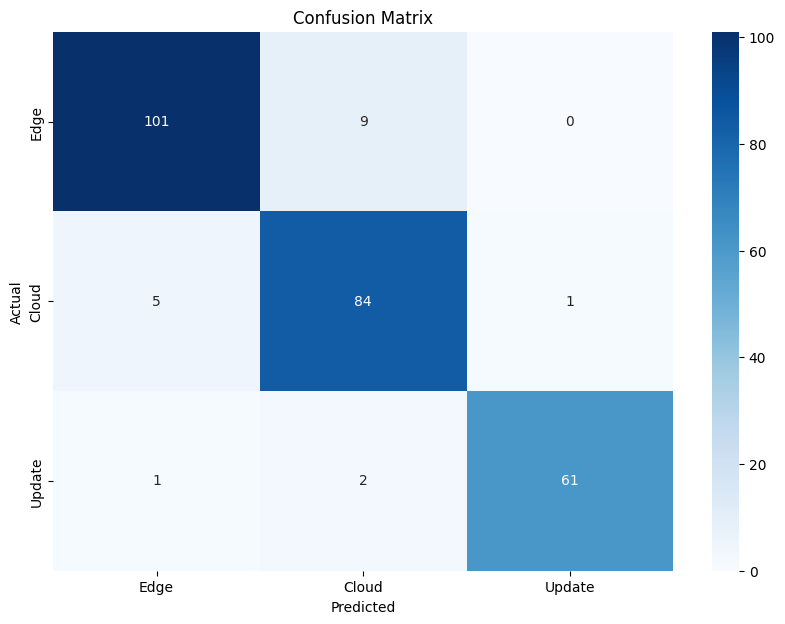

Precision: 0.94
Recall: 0.93
F1 Score: 0.94
ROC-AUC Score: 0.9495767869582524


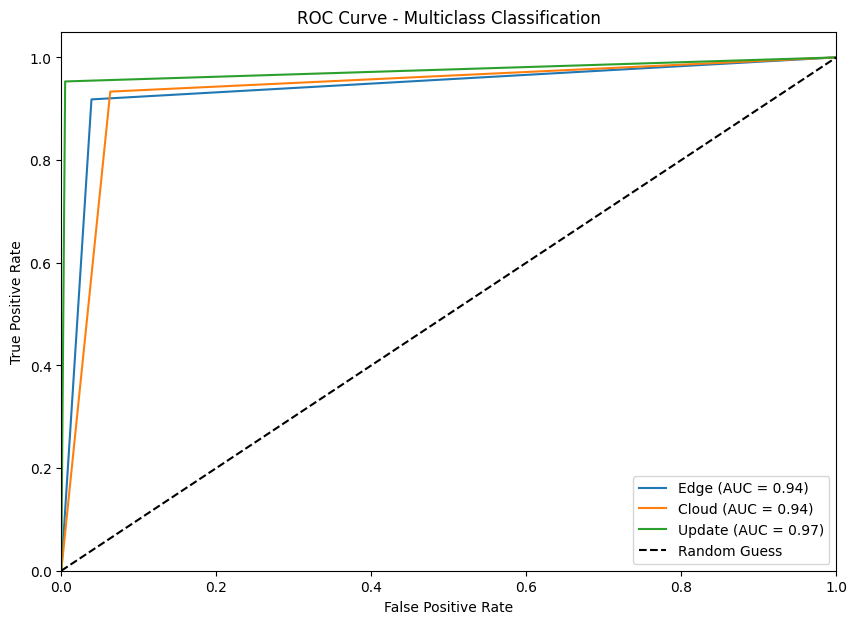

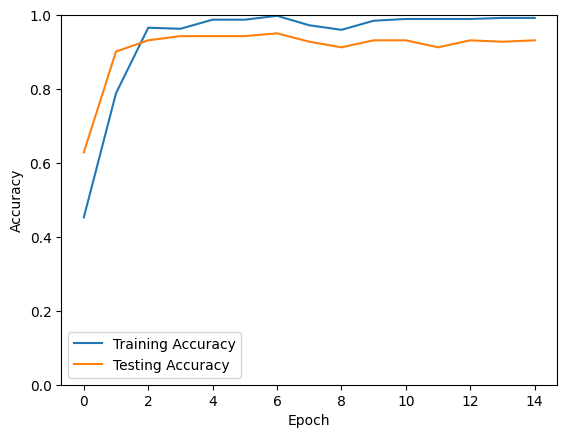

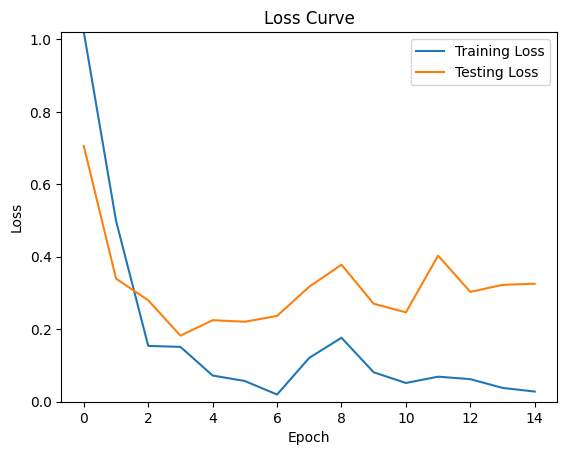

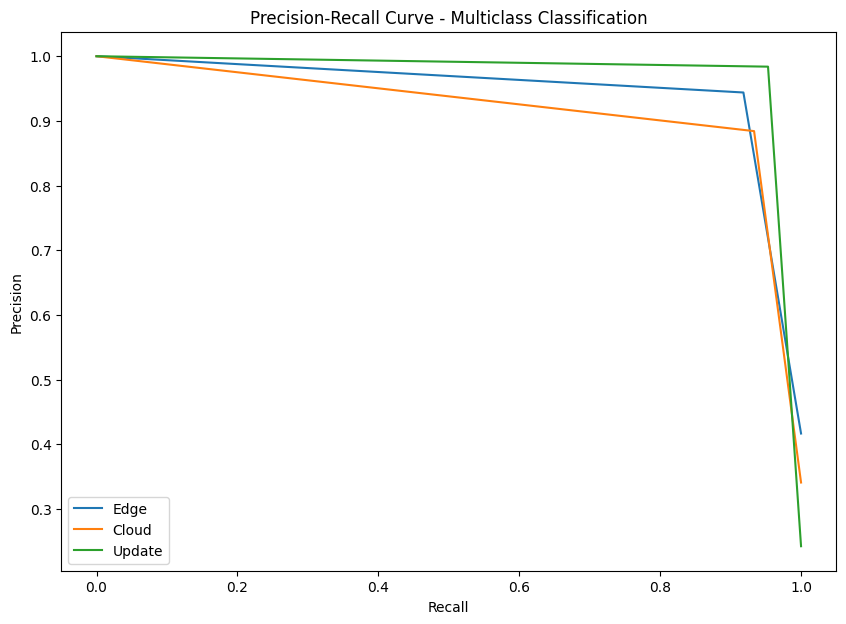

In [ ]:
epochs=15
batch_size=64
tokenizer, model, max_sequence_length=Main_Model(X,y,Y_Categorical,epochs,batch_size)

In [ ]:
#y_encoded[11]
print(y.count())
print(y.unique())

1320
[0 1 2]


In [ ]:
tokenizer

In [ ]:

# Save your model in the SavedModel format (if not already)
model.save('./RNN_save_model/LSTM/MAINMODEL/RNN_Multiclass_Subclass.h5')

In [ ]:
import joblib
# Assuming model is your trained model object
#joblib.dump(model, './RNN_save_model/LSTM/MAINMODEL/RNN_Multiclass_Subclass.joblib')
joblib.dump(tokenizer, './RNN_save_model/LSTM/MAINMODEL/tokenizer.joblib')
joblib.dump(max_sequence_length, './RNN_save_model/LSTM/MAINMODEL/max_sequence_length_mainModel.joblib')

['./RNN_save_model/LSTM/MAINMODEL/max_sequence_length_mainModel.joblib']

In [ ]:
import tensorflow as tf

# Load your trained Keras model
model = tf.keras.models.load_model('./RNN_save_model/LSTM/MAINMODEL/RNN_Multiclass_Subclass.h5')

# Initialize the converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Fix: Enable resource variables and allow Select TF ops
converter.experimental_enable_resource_variables = True
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,       # enable TFLite ops
    tf.lite.OpsSet.SELECT_TF_OPS          # enable TF ops (fallback for unsupported ones)
]

# Fix: Prevent lowering of tensor list ops (required for LSTM conversion)
converter._experimental_lower_tensor_list_ops = False

# Optional: Enable optimization (e.g., for size)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model
tflite_model = converter.convert()

# Save the converted model
with open('./RNN_save_model/LSTM/MAINMODEL/RNN_Multiclass_Subclass.tflite', 'wb') as f:
    f.write(tflite_model)

print("✅ TFLite model successfully saved and ready for deployment.")


Saved artifact at '/tmp/tmpi_v3sldq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 29), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  134317891229200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134317746090064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134317746083728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134317746084688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134317746082960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134317746085648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134317746088144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134317746087184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134317746090256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134317746090832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134317746083152: TensorS

In [ ]:
import joblib
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# === Load tokenizer and max sequence length ===
tokenizer = joblib.load('./RNN_save_model/LSTM/MAINMODEL/tokenizer.joblib')
max_seq_len = joblib.load('./RNN_save_model/LSTM/MAINMODEL/max_sequence_length_mainModel.joblib')

# === Load the TFLite model ===
interpreter = tf.lite.Interpreter(model_path='./RNN_save_model/LSTM/MAINMODEL/RNN_Multiclass_Subclass.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# === Preprocess a text input ===
def preprocess_input(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_seq_len, padding='post')
    return np.array(padded, dtype=np.float32)  # FIX: convert to float32


def predict_class(command, tokenizer, interpreter, max_seq_len):
    # Preprocess
    sequence = tokenizer.texts_to_sequences([command])
    padded = pad_sequences(sequence, maxlen=max_seq_len, padding='post')
    input_data = np.array(padded, dtype=np.float32)

    # Set input tensor
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()

    # Get output
    output_data = interpreter.get_tensor(output_details[0]['index'])
    prediction = np.argmax(output_data, axis=-1)[0]
    return prediction

# === Class label mapping ===
class_labels = {
    0: 'Edge',
    1: 'Cloud',
    2: 'Update'
}


In [ ]:
# === Example usage ===
sample_text = "Update bike Software"
predicted_class = predict_class(sample_text, tokenizer, interpreter, max_seq_len)
print("Predicted Class Index:", predicted_class)

# Map to class label
predicted_label = class_labels.get(predicted_class, "Unknown")
print("Predicted Label:", predicted_label)



Predicted Class Index: 2
Predicted Label: Update


In [ ]:
# Load your dataset
df_test = pd.read_csv("./DataSet/Comparision_AvsS.csv",encoding="latin1")  # Update with your dataset filename


In [ ]:
df_test['Command']

,Command
0,Please check for update
1,Please show me current update
2,please perform bike update
3,please kindly perform bike update
4,will I reach hyderabad with current fuel
5,Check for update
6,Show me current update
7,perform bike update
8,kindly perform bike update
9,Kindly tell me whether will I reach hyderabad...


In [ ]:
#model=tflite_model
results=[]
for cmds in df_test['Command']:
    prediction = predict_class(cmds,tokenizer,interpreter,max_seq_len)
    if(prediction==0):
        print("Edge :", prediction)
        results.append('EDGE')
    elif(prediction==1):
        print("Cloud :", prediction)
        results.append('CLOUD')
    elif(prediction==2):
        print("Update :",prediction)
        results.append('UPDATE')
    elif(prediction==3):
        print("Miscellaneous :",prediction)
        results.append('MISCELLANEOUS')
    else:
        print("Dont know")

print(results)

Update : 2
Cloud : 1
Update : 2
Update : 2
Edge : 0
Update : 2
Cloud : 1
Update : 2
Update : 2
Cloud : 1
Edge : 0
Edge : 0
Cloud : 1
Cloud : 1
Cloud : 1
Cloud : 1
Cloud : 1
Cloud : 1
Cloud : 1
Edge : 0
Edge : 0
Edge : 0
Edge : 0
Edge : 0
Edge : 0
Edge : 0
Edge : 0
Cloud : 1
Cloud : 1
Cloud : 1
Edge : 0
Cloud : 1
Cloud : 1
Cloud : 1
Cloud : 1
Update : 2
Update : 2
Update : 2
Update : 2
Update : 2
Update : 2
['UPDATE', 'CLOUD', 'UPDATE', 'UPDATE', 'EDGE', 'UPDATE', 'CLOUD', 'UPDATE', 'UPDATE', 'CLOUD', 'EDGE', 'EDGE', 'CLOUD', 'CLOUD', 'CLOUD', 'CLOUD', 'CLOUD', 'CLOUD', 'CLOUD', 'EDGE', 'EDGE', 'EDGE', 'EDGE', 'EDGE', 'EDGE', 'EDGE', 'EDGE', 'CLOUD', 'CLOUD', 'CLOUD', 'EDGE', 'CLOUD', 'CLOUD', 'CLOUD', 'CLOUD', 'UPDATE', 'UPDATE', 'UPDATE', 'UPDATE', 'UPDATE', 'UPDATE']


In [ ]:
# sample_text = "Update bike Software"
# predicted_class = predict_class(sample_text, tokenizer, interpreter, max_seq_len)
# print("Predicted Class Index:", predicted_class)

# # Map to class label
# predicted_label = class_labels.get(predicted_class, "Unknown")
# print("Predicted Label:", predicted_label)

In [ ]:
#results

In [ ]:
# Convert list to DataFrame
df_testResult = pd.DataFrame(results, columns=['Test_Result'])
#df_testResult

In [ ]:
dfconcat_testResult= pd.concat([df_test['Command'],df_test['SubClass'], df_testResult['Test_Result']], axis=1)

# Convert values in 'SubClass' column to uppercase
dfconcat_testResult['SubClass'] = dfconcat_testResult['SubClass'].str.upper()

# Create 'TrueFalse' column based on conditions
dfconcat_testResult['TrueFalse'] = dfconcat_testResult['SubClass'] == dfconcat_testResult['Test_Result'].str.upper()

dfconcat_testResult

,Command,SubClass,Test_Result,TrueFalse
0,Please check for update,UPDATE,UPDATE,True
1,Please show me current update,UPDATE,CLOUD,False
2,please perform bike update,UPDATE,UPDATE,True
3,please kindly perform bike update,UPDATE,UPDATE,True
4,will I reach hyderabad with current fuel,EDGE,EDGE,True
5,Check for update,UPDATE,UPDATE,True
6,Show me current update,UPDATE,CLOUD,False
7,perform bike update,UPDATE,UPDATE,True
8,kindly perform bike update,UPDATE,UPDATE,True
9,Kindly tell me whether will I reach hyderabad...,EDGE,CLOUD,False


In [ ]:
#######################################################################################################################
############################################## Subclass Category ######################################################

In [ ]:
# Set the random seeds for reproducibility
def set_seed(seed=1):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

# Optionally, if using GPU, configure GPU settings to avoid non-determinism
def configure_gpu_memory_growth():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(e)

# Call these functions at the start of your code to ensure reproducibility
set_seed(1)  # Setting the seed for reproducibility
configure_gpu_memory_growth()  # Optionally manage GPU memory growth

In [ ]:
df_edge = df[df['Subclass'] == 'Edge']
df_cloud = df[df['Subclass'] == 'Cloud']
df_update = df[df['Subclass'] == 'Update']
df_miscellaneous = df[df['Subclass'] == 'Miscellaneous']
df_notneeded = df[df['Subclass'] == 'Not needed']

df_edge.reset_index(drop=True, inplace=True)
df_cloud.reset_index(drop=True, inplace=True)
df_update.reset_index(drop=True, inplace=True)
df_miscellaneous.reset_index(drop=True, inplace=True)
df_notneeded.reset_index(drop=True, inplace=True)

In [ ]:


# Save DataFrame to a CSV file
df_edge.to_csv("df_edge.csv", index=False)
df_edge

,Class,Subclass,SubclassCategory,Commands,Response,Label
0,Bike,Edge,Battery/Fuel,What is my current battery level?,Updating please wait,1
1,Bike,Edge,Battery/Fuel,How much range do I have left on my battery?,Updating please wait,1
2,Bike,Edge,Battery/Fuel,When was the last time my battery was charged?,Updating please wait,1
3,Bike,Edge,Battery/Fuel,How long until my battery is fully charged?,Updating please wait,1
4,Bike,Edge,Battery/Fuel,How long should I charge my vehicle for a suff...,Updating please wait,1
...,...,...,...,...,...,...
546,Bike,Edge,Basic,Check for loose bolts in the bike's rear wheel...,Inspect and tighten any loose bolts in the rea...,1
547,Bike,Edge,Basic,Perform a bike clutch cable inspection,Inspect the clutch cable for signs of wear and...,1
548,Bike,Edge,Battery/Fuel,will I reach hyderabad with current fuel,Processing your fuel related command please wait,1
549,Bike,Edge,Battery/Fuel,Kindly will I reach hyderabad with current fuel,Processing your fuel related command please wait,1


In [ ]:
# Replace 'column_name' with the actual column name you're interested in
unique_values = df_edge['SubclassCategory'].unique()

# Display the unique values
print(unique_values)

unique_values_count = df_edge['SubclassCategory'].value_counts()
print(unique_values_count)


['Battery/Fuel' 'Tires/Tyres' 'Basic']
SubclassCategory
Basic           287
Battery/Fuel    144
Tires/Tyres     120
Name: count, dtype: int64


In [ ]:
df_cloud
# Save DataFrame to a CSV file
#df_cloud.to_csv("df_cloud.csv", index=False)

,Class,Subclass,SubclassCategory,Commands,Response,Label
0,Bike,Cloud,Songs/media,"Play ""XYZ"" by ""ABC""","Please wait, your request is been processed.",1
1,Bike,Cloud,Songs/media,Play my favorite song.,"Please wait, your request is been processed.",1
2,Bike,Cloud,Songs/media,Start playing music.,"Please wait, your request is been processed.",1
3,Bike,Cloud,Songs/media,Shuffle my playlist.,"Please wait, your request is been processed.",1
4,Bike,Cloud,Songs/media,Play the latest track.,"Please wait, your request is been processed.",1
...,...,...,...,...,...,...
445,Bike,Cloud,Traffic/Maps,Navigate to banglore,You receive turn-by-turn directions to [destin...,1
446,Bike,Cloud,Weather,Check weather forecast,The weather forecast is [weather].,1
447,Bike,Cloud,Songs/media,Play music,Your favorite music starts playing.,1
448,Bike,Cloud,Traffic/Maps,Take a scenic route,The navigation suggests a scenic route.,1


In [ ]:
# Replace 'column_name' with the actual column name you're interested in
unique_values = df_cloud['SubclassCategory'].unique()

# Display the unique values
print(unique_values)

unique_values_count = df_cloud['SubclassCategory'].value_counts()
print(unique_values_count)


['Songs/media' 'News/Notification' 'Weather' 'Traffic/Maps']
SubclassCategory
Traffic/Maps         145
Songs/media          102
News/Notification    102
Weather              101
Name: count, dtype: int64


In [ ]:
df_update
# Save DataFrame to a CSV file
#df_update.to_csv("df_update.csv", index=False)

,Class,Subclass,SubclassCategory,Commands,Response,Label
0,Bike,Update,Cancel,Abort pending bike firmware update,Aborting please wait,1
1,Bike,Update,Cancel,Abort pending bike system update,Aborting please wait,1
2,Bike,Update,Cancel,Abort software update for bike,Aborting please wait,1
3,Bike,Update,Cancel,Cancel bike firmware update,Aborting please wait,1
4,Bike,Update,Cancel,Cancel bike software update process,Aborting please wait,1
...,...,...,...,...,...,...
314,Bike,Update,Check,Check for current update,Processing your command,1
315,Bike,Update,Check,Check for current available update,Processing your command,1
316,Bike,Update,Check,Please check for current available update,Processing your command,1
317,Bike,Update,Check,Please check for current update,Processing your command,1


In [ ]:
# Replace 'column_name' with the actual column name you're interested in
unique_values = df_update['SubclassCategory'].unique()

# Display the unique values
print(unique_values)

unique_values_count = df_update['SubclassCategory'].value_counts()
print(unique_values_count)


['Cancel' 'Perform' 'Check']
SubclassCategory
Check      116
Perform    103
Cancel     100
Name: count, dtype: int64


In [ ]:
df_notneeded
# Save DataFrame to a CSV file
#df_notneeded.to_csv("df_notneeded.csv", index=False)

,Class,Subclass,SubclassCategory,Commands,Response,Label
0,Bike,Not needed,Greetings,Hi TVS!,Hi,1
1,Bike,Not needed,Greetings,"Hello, Vehicle!",Hello,1
2,Bike,Not needed,Greetings,Good morning!,Good morning,1
3,Bike,Not needed,Greetings,Good afternoon!,Good afternoon,1
4,Bike,Not needed,Greetings,Good evening!,Good evening,1
...,...,...,...,...,...,...
1665,NonBike,Not needed,NC,Perform my pets marriage,It is a non bike command,0
1666,NonBike,Not needed,NC,Perform my dogs marriage,It is a non bike command,0
1667,NonBike,Not needed,NC,check blood pressure,It is a non bike command,0
1668,NonBike,Not needed,NC,check balloon pressure,It is a non bike command,0


In [ ]:
def train_model_subClassCategory(df, filename, subclassCat,epochs=20, batch_size=64):

    # Preprocessing
    X = df['Commands']
    df = df.copy()
    df['Subclass_Label_Category'], _ = pd.factorize(df['SubclassCategory'])

    # Save DataFrame to a CSV file
    df.to_csv(filename, index=False)

    y = df['Subclass_Label_Category']

    # Tokenize the text data
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X)
    X_sequences = tokenizer.texts_to_sequences(X)

    # Padding sequences to make them of equal length
    max_sequence_length = max([len(seq) for seq in X_sequences])
    X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length, padding='post')

    # Convert labels to one-hot encoding
    y_encoded = to_categorical(y)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)

    # Define the RNN model for multiclass classification
    num_classes = len(np.unique(y))  # Number of unique classes
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_sequence_length))
    model.add(LSTM(256, return_sequences=True))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(num_classes, activation='softmax'))  # Softmax activation for multiclass classification

    # Compile the model with categorical cross-entropy loss
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    # Save the model and tokenizer
    joblib.dump(model, './RNN_save_model/LSTM/'+subclassCat+'/RNN_Multiclass_SubclassCategory.joblib')
    joblib.dump(tokenizer, './RNN_save_model/LSTM/'+subclassCat+'/tokenizer.joblib')
    joblib.dump(max_sequence_length, './RNN_save_model/LSTM/'+subclassCat+'/max_sequence_length.joblib')

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)

    # Predict on test data
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_test_actual = np.argmax(y_test, axis=1)

    # Classification report (Precision, Recall, F1-Score)
    print("\nClassification Report:\n", classification_report(y_test_actual, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test_actual, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Calculate Precision, Recall, F1-Score
    precision, recall, f1, _ = precision_recall_fscore_support(y_test_actual, y_pred, average='macro')
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # ROC-AUC Curve (One-vs-Rest)
    y_test_bin = label_binarize(y_test_actual, classes=np.arange(num_classes))  # Binarize labels for ROC-AUC
    roc_auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')
    print(f"ROC-AUC Score: {roc_auc:.2f}")

    # Plot ROC curve for each class
    fpr = dict()
    tpr = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])

    plt.figure(figsize=(10, 7))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Multiclass Classification')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall Curve for each class
    precision_dict = dict()
    recall_dict = dict()

    for i in range(num_classes):
        precision_dict[i], recall_dict[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])

    plt.figure(figsize=(10, 7))
    for i in range(num_classes):
        plt.plot(recall_dict[i], precision_dict[i], label=f'Class {i}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - Multiclass Classification')
    plt.legend(loc="lower left")
    plt.show()

    # Plot both training and testing accuracy curves
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend()
    plt.show()

    return model, tokenizer, max_sequence_length

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 228ms/step - accuracy: 0.4875 - loss: 1.0360 - val_accuracy: 0.5586 - val_loss: 0.8840
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.7696 - loss: 0.6038 - val_accuracy: 0.8198 - val_loss: 0.5332
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.8575 - loss: 0.4268 - val_accuracy: 0.8198 - val_loss: 0.4888
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 246ms/step - accuracy: 0.9515 - loss: 0.2123 - val_accuracy: 0.9189 - val_loss: 0.2873
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 0.9571 - loss: 0.1977 - val_accuracy: 0.9459 - val_loss: 0.2237
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.9758 - loss: 0.1142 - val_accuracy: 0.9369 - val_loss: 0.2890
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.9705 - loss: 0.1117 - val_accuracy: 0.9459 - val_loss: 0.2079
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.9833 - loss: 0.0848 - val_accuracy: 0

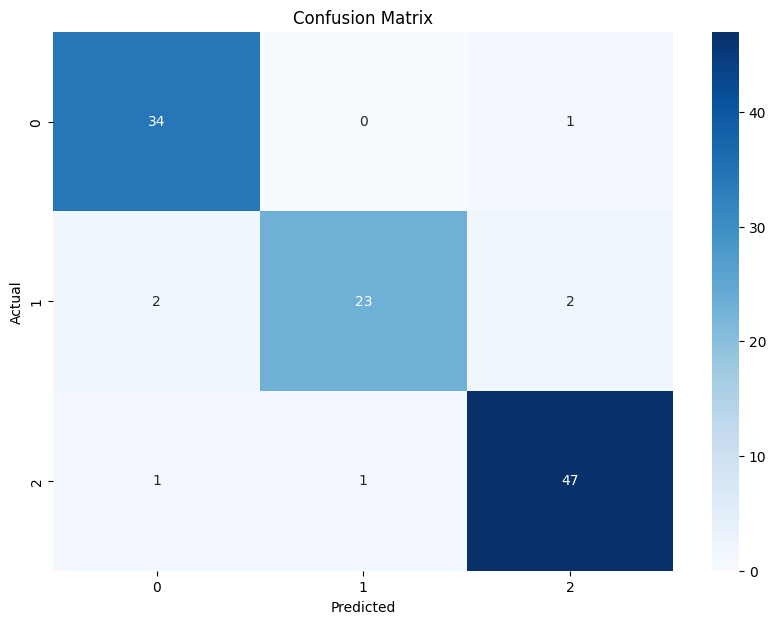

Precision: 0.94
Recall: 0.93
F1 Score: 0.93
ROC-AUC Score: 0.96


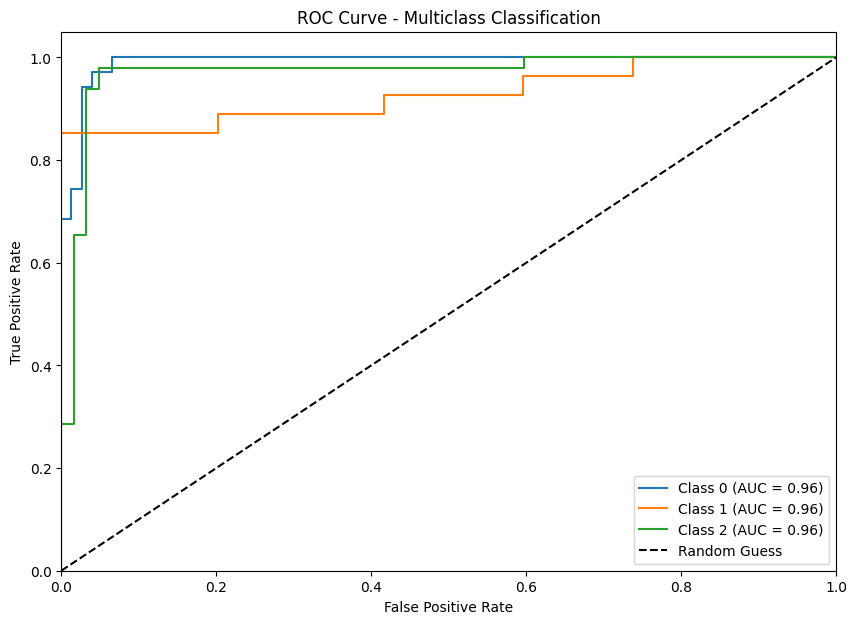

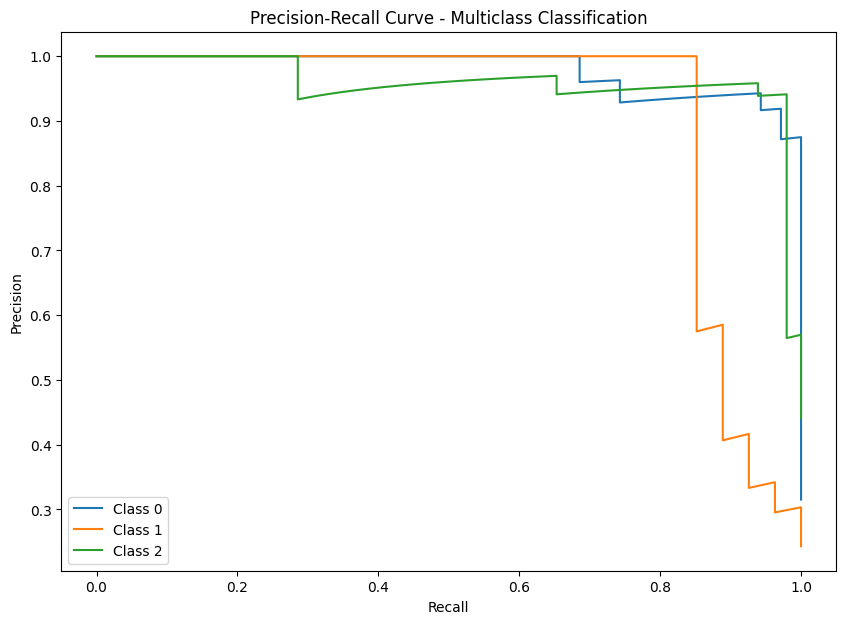

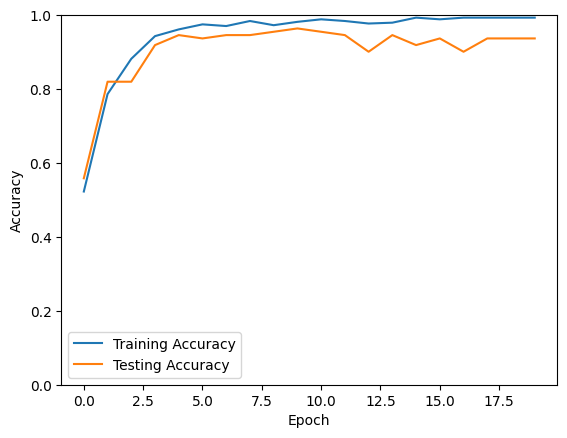

In [ ]:
######################################################EDGE########################################################
filename="df_edge.csv"
subclasscat="EDGE"

# Get the number of rows
num_rows = df_edge
print(f"Number of rows: {num_rows.shape[0]}")

epochs=20
batch_size=32
model,tokenizer, max_sequence_length=train_model_subClassCategory(df_edge,filename,subclasscat,epochs, batch_size)

In [ ]:
# Save your model in the SavedModel format (if not already)
model.save('./RNN_save_model/LSTM/'+subclasscat+'/RNN_Multiclass_SubclassCategory.h5')

In [ ]:
# Load your trained Keras model
model = tf.keras.models.load_model('./RNN_save_model/LSTM/'+subclasscat+'/RNN_Multiclass_SubclassCategory.h5')

# Initialize the converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Fix: Enable resource variables and allow Select TF ops
converter.experimental_enable_resource_variables = True
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,       # enable TFLite ops
    tf.lite.OpsSet.SELECT_TF_OPS          # enable TF ops (fallback for unsupported ones)
]

# Fix: Prevent lowering of tensor list ops (required for LSTM conversion)
converter._experimental_lower_tensor_list_ops = False

# Optional: Enable optimization (e.g., for size)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model
tflite_model = converter.convert()

# Save the converted model
with open('./RNN_save_model/LSTM/'+subclasscat+'/RNN_Multiclass_SubclassCategory.tflite', 'wb') as f:
    f.write(tflite_model)

print("✅ TFLite model successfully saved and ready for deployment.")

Saved artifact at '/tmp/tmpft8f5e25'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 18), dtype=tf.float32, name='input_layer_21')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  132970690185360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970690186704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970690189008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970690191120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970690185168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970690195536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970690198608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970690194192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970398536080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970398537040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970398539536: Tens

In [ ]:
# === Load the TFLite model ===
interpreter = tf.lite.Interpreter(model_path='./RNN_save_model/LSTM/'+subclasscat+'/RNN_Multiclass_SubclassCategory.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

tokenizer = joblib.load('./RNN_save_model/LSTM/'+subclasscat+'/tokenizer.joblib')
max_sequence_length=joblib.load('./RNN_save_model/LSTM/'+subclasscat+'/max_sequence_length.joblib')

In [ ]:
# Example usage:
command = input("Enter a command: ")
print(command)
prediction = predict_class(command, tokenizer,interpreter, max_sequence_length)
if(prediction==0):
    print("Edge -> Battery Fuel:", prediction)
elif(prediction==1):
    print("Edge -> Tires:", prediction)
elif(prediction==2):
    print("Edge -> Basic :",prediction)
else:
    print("Dont know")

Enter a command: check pyre pressure
check pyre pressure
Edge -> Tires: 1


Number of rows: 450
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.2554 - loss: 1.3854 - val_accuracy: 0.3444 - val_loss: 1.3766
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 829ms/step - accuracy: 0.3153 - loss: 1.3779 - val_accuracy: 0.3444 - val_loss: 1.3820
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 605ms/step - accuracy: 0.3153 - loss: 1.3732 - val_accuracy: 0.3444 - val_loss: 1.3654
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 580ms/step - accuracy: 0.3153 - loss: 1.3542 - val_accuracy: 0.3444 - val_loss: 1.2963
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 580ms/step - accuracy: 0.3821 - loss: 1.2806 - val_accuracy: 0.5444 - val_loss: 1.1332
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 595ms/step - accuracy: 0.5768 - loss: 1.0859 - val_accuracy: 0.5444 - val_loss: 1.0376
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 744ms/step - accuracy: 0.6628 - loss: 0.9084 - val_accuracy: 0.7111 - val_loss: 0.8612
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step - accuracy: 0.7192 - loss: 0.7258 - val_accuracy: 0.7556 - val_loss: 0.6989
Epoch

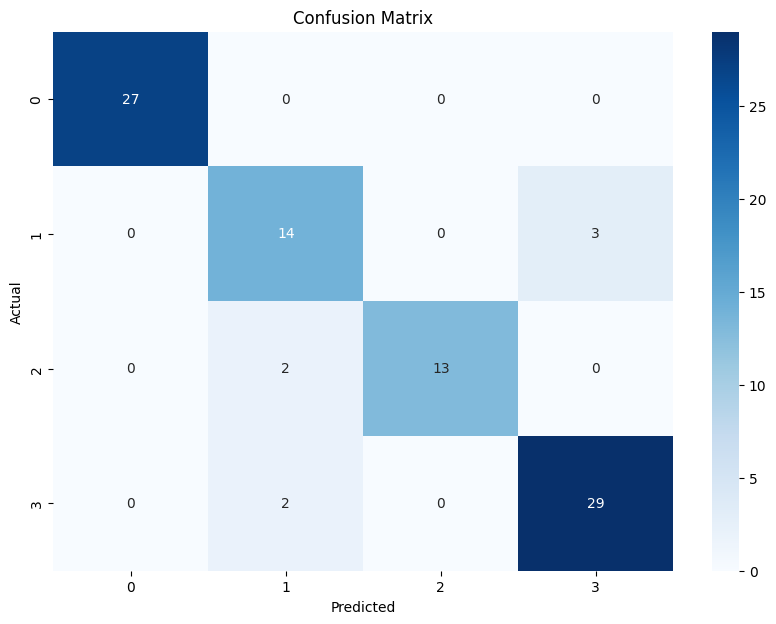

Precision: 0.92
Recall: 0.91
F1 Score: 0.91
ROC-AUC Score: 0.95


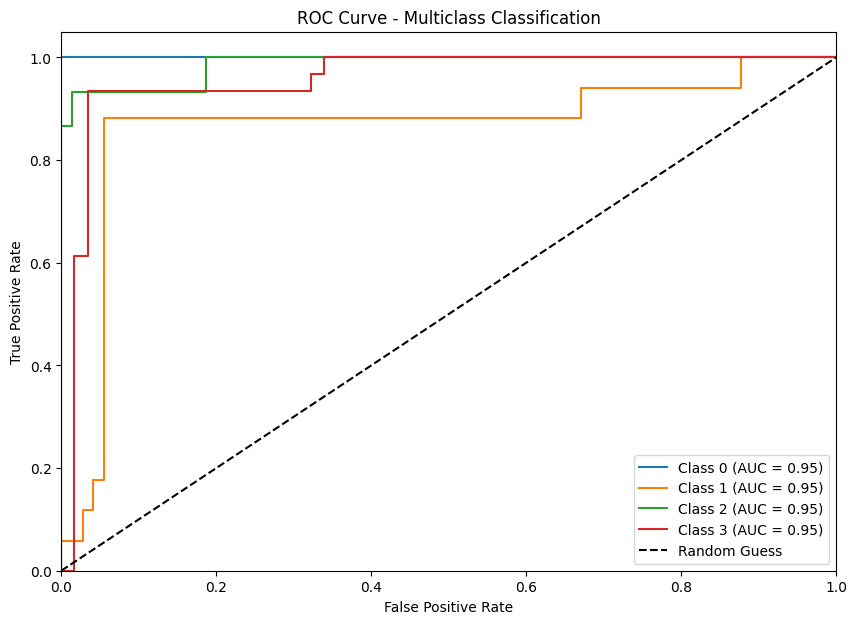

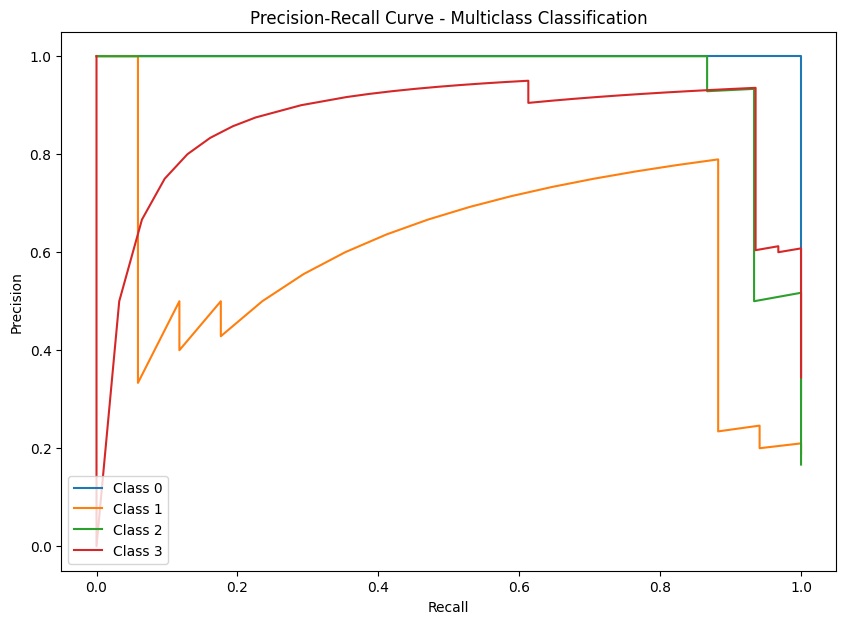

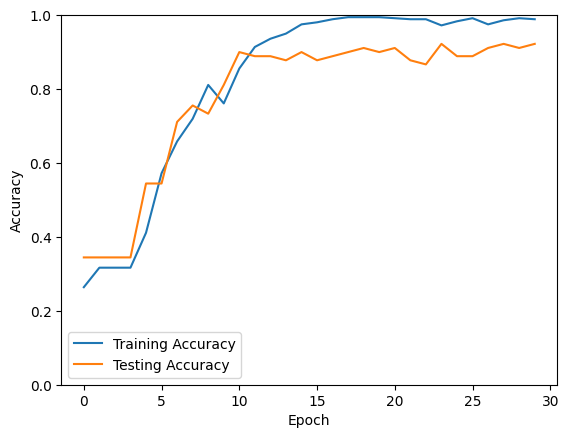

In [ ]:
########################################################CLOUD###############################################
filename="df_cloud.csv"
subclasscat="CLOUD"

# Get the number of rows
num_rows = df_cloud
print(f"Number of rows: {num_rows.shape[0]}")

epochs=30
batch_size=256
model,tokenizer, max_sequence_length=train_model_subClassCategory(df_cloud,filename,subclasscat,epochs,batch_size)

In [ ]:
# Save your model in the SavedModel format (if not already)
model.save('./RNN_save_model/LSTM/'+subclasscat+'/RNN_Multiclass_SubclassCategory.h5')

In [ ]:
# Load your trained Keras model
model = tf.keras.models.load_model('./RNN_save_model/LSTM/'+subclasscat+'/RNN_Multiclass_SubclassCategory.h5')

# Initialize the converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Fix: Enable resource variables and allow Select TF ops
converter.experimental_enable_resource_variables = True
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,       # enable TFLite ops
    tf.lite.OpsSet.SELECT_TF_OPS          # enable TF ops (fallback for unsupported ones)
]

# Fix: Prevent lowering of tensor list ops (required for LSTM conversion)
converter._experimental_lower_tensor_list_ops = False

# Optional: Enable optimization (e.g., for size)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model
tflite_model = converter.convert()

# Save the converted model
with open('./RNN_save_model/LSTM/'+subclasscat+'/RNN_Multiclass_SubclassCategory.tflite', 'wb') as f:
    f.write(tflite_model)

print("✅ TFLite model successfully saved and ready for deployment.")

Saved artifact at '/tmp/tmph58rdh2w'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 29), dtype=tf.float32, name='input_layer_29')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  132970665009296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970452722384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970452723920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970452721616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970452717584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970452715664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970452719504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970743690448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970743683536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970743684880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970743685456: Tens

In [ ]:
# Load the model from and tokenizer
interpreter = tf.lite.Interpreter(model_path='./RNN_save_model/LSTM/'+subclasscat+'/RNN_Multiclass_SubclassCategory.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

tokenizer = joblib.load('./RNN_save_model/LSTM/'+subclasscat+'/tokenizer.joblib')
max_sequence_length=joblib.load('./RNN_save_model/LSTM/'+subclasscat+'/max_sequence_length.joblib')

In [ ]:
# Example usage:
command = input("Enter a command: ")
print(command)
prediction = predict_class(command, tokenizer,interpreter, max_sequence_length)
if(prediction==0):
    print("Cloud -> Song Media:", prediction)
elif(prediction==1):
    print("Cloud -> News Notification:", prediction)
elif(prediction==2):
    print("Cloud -> Weather :",prediction)
elif(prediction==3):
    print("Cloud -> Traffic Maps :",prediction)
else:
    print("Dont know")

Enter a command: go to the location kanyakumari
go to the location kanyakumari
Cloud -> Traffic Maps : 3


Number of rows: 319
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 672ms/step - accuracy: 0.4242 - loss: 1.0920 - val_accuracy: 0.5469 - val_loss: 1.0515
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.6656 - loss: 0.9728 - val_accuracy: 0.5469 - val_loss: 0.7748
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.6787 - loss: 0.6205 - val_accuracy: 0.5625 - val_loss: 0.6225
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.6912 - loss: 0.5157 - val_accuracy: 0.6094 - val_loss: 0.5652
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.7126 - loss: 0.4847 - val_accuracy: 0.6094 - val_loss: 0.5389
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.7715 - loss: 0.4124 - val_accuracy: 0.8125 - val_loss: 0.4600
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.8769 - loss: 0.3560 - val_accuracy: 0.8906 - val_loss: 0.3432
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.9108 - loss: 0.2772 - val_accuracy: 0.9531 - val_loss: 0.2182
Ep

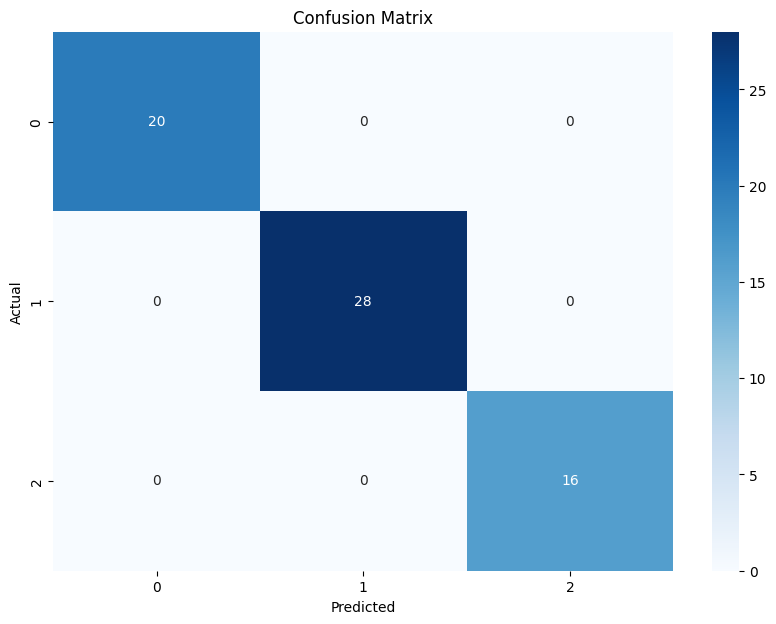

Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC Score: 1.00


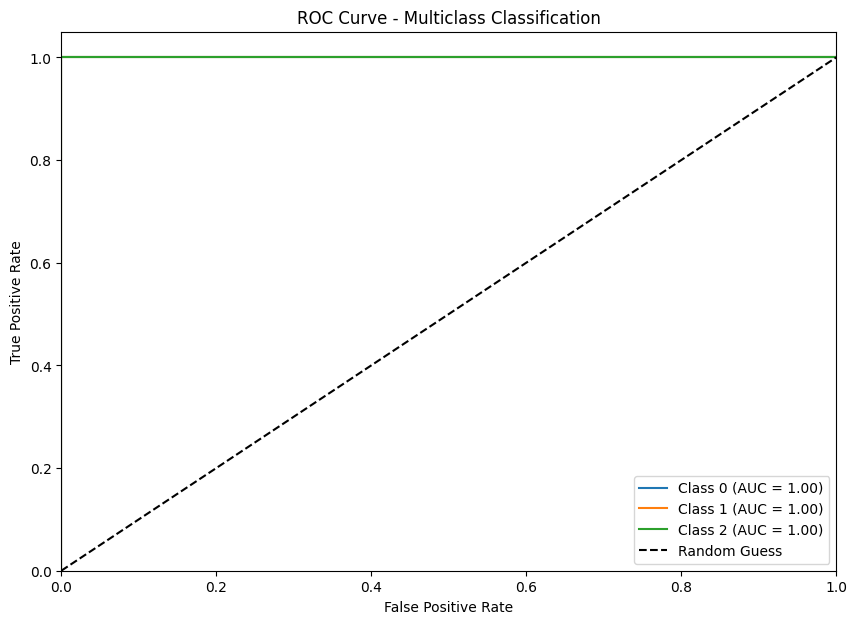

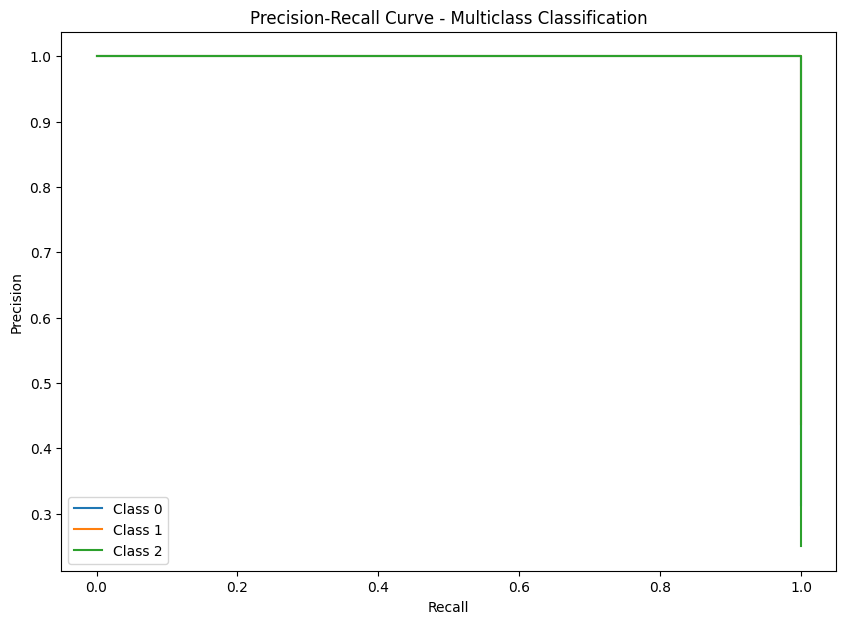

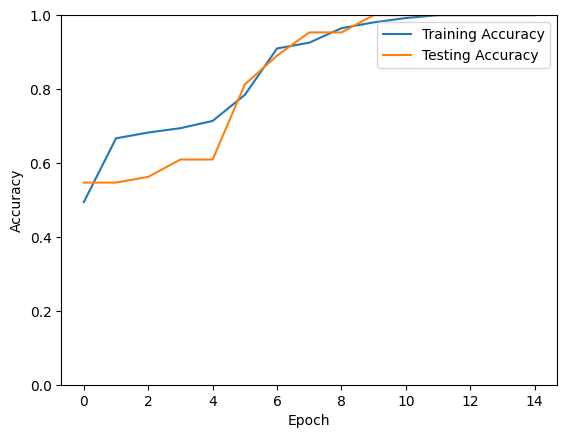

In [ ]:
###########################################Update#################################################
filename="df_update.csv"
subclasscat="UPDATE"

# Get the number of rows
num_rows = df_update
print(f"Number of rows: {num_rows.shape[0]}")

epochs=15
batch_size=64

model,tokenizer, max_sequence_length=train_model_subClassCategory(df_update,filename,subclasscat,epochs,batch_size)

In [ ]:
# Save your model in the SavedModel format (if not already)
model.save('./RNN_save_model/LSTM/'+subclasscat+'/RNN_Multiclass_SubclassCategory.h5')

In [ ]:
# Load your trained Keras model
model = tf.keras.models.load_model('./RNN_save_model/LSTM/'+subclasscat+'/RNN_Multiclass_SubclassCategory.h5')

# Initialize the converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Fix: Enable resource variables and allow Select TF ops
converter.experimental_enable_resource_variables = True
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,       # enable TFLite ops
    tf.lite.OpsSet.SELECT_TF_OPS          # enable TF ops (fallback for unsupported ones)
]

# Fix: Prevent lowering of tensor list ops (required for LSTM conversion)
converter._experimental_lower_tensor_list_ops = False

# Optional: Enable optimization (e.g., for size)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model
tflite_model = converter.convert()

# Save the converted model
with open('./RNN_save_model/LSTM/'+subclasscat+'/RNN_Multiclass_SubclassCategory.tflite', 'wb') as f:
    f.write(tflite_model)

print("✅ TFLite model successfully saved and ready for deployment.")

Saved artifact at '/tmp/tmpyel9qvc_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 14), dtype=tf.float32, name='input_layer_33')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  132970397350416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970303195280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970303197968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970303197392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970303193168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970303196048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970303195664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970312211472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970312215888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970312219920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132970312218768: Tens

In [ ]:
# Load the model from and tokenizer
interpreter = tf.lite.Interpreter(model_path='./RNN_save_model/LSTM/'+subclasscat+'/RNN_Multiclass_SubclassCategory.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

tokenizer = joblib.load('./RNN_save_model/LSTM/'+subclasscat+'/tokenizer.joblib')
max_sequence_length=joblib.load('./RNN_save_model/LSTM/'+subclasscat+'/max_sequence_length.joblib')

In [ ]:
# Example usage:
command = input("Enter a command: ")
print(command)
prediction = predict_class(command, tokenizer,interpreter, max_sequence_length)
if(prediction==0):
    print("Update -> Cancel:", prediction)
elif(prediction==1):
    print("Update -> Perform:", prediction)
elif(prediction==2):
    print("Update -> Check:",prediction)
else:
    print("Dont know")

Enter a command: check for update
check for update
Update -> Check: 2
